In [5]:
import sklearn as sl
print('Versão do scikit-learn:', sl.__version__)

Versão do scikit-learn: 0.18.1


#### Dataset from UCI: Pima Indians Diabetes Data Set
#### Link: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
#### DataSet Description: informa os registros médicos dos pacientes do Pima Inidians e, para cada registro, indica se o paciente desenvolveu ou não diabetes.

### Attribute Information:
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

#### PROBLEMA DE NEGÓCIO: efetuar a previsão para o desenvolvimento de diabetes com base nas informações e características do paciente avaliado.

#### >>> problema de negócio + fontes de dados + compreender os dados <<<

## 1 - Extração e carregamento dos dados
##### Existem diversas considerações ao se carregar dados para o processo de Machine Learning. Por exemplo:
#### -> Seus dados possuem um header (cabeçalho)? Caso negativo, você vai precisar definir o título para cada coluna.
#### -> Seus arquivos possuem comentários?
#### -> Qual o delimitador das colunas?
#### -> Alguns dados estão entre aspas, simples ou duplas?

In [17]:
import numpy as np
import requests

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
response = requests.get(url, stream=True)
request_webcontent = response.text

print('Para colocar os dados para um objeto NUMPY, devemos primeiramente carregá-lo para uma')
print('variável em PYTHON, para depois carregá-lo para o NUMPY.\n')

# gera o conteúdo dentro do arquivo CSV
file = open('pima-indians-diabetes.csv', 'w')
file.write(str(request_webcontent))
file.close

# coloca o conteúdo do arquivo gerado para dentro de uma variável
data_file = open('pima-indians-diabetes.csv', 'rb')

# carrega conteúdo do arquivo para um array NUMPY
data = np.loadtxt(fname=data_file, delimiter=',', usecols=(0,1,2,3,4,5,6,7,8))
print('Shape do array [data]:', data.shape)

data

Para colocar os dados para um objeto NUMPY, devemos primeiramente carregá-lo para uma
variável em PYTHON, para depois carregá-lo para o NUMPY.

Shape do array [data]: (768, 9)


array([[   6.   ,  148.   ,   72.   , ...,    0.627,   50.   ,    1.   ],
       [   1.   ,   85.   ,   66.   , ...,    0.351,   31.   ,    0.   ],
       [   8.   ,  183.   ,   64.   , ...,    0.672,   32.   ,    1.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,    0.245,   30.   ,    0.   ],
       [   1.   ,  126.   ,   60.   , ...,    0.349,   47.   ,    1.   ],
       [   1.   ,   93.   ,   70.   , ...,    0.315,   23.   ,    0.   ]])

In [2]:
# Carregando arquivo csv usando PANDAS
from pandas import read_csv
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')
print('Shape do dataframe [df]:', data.shape)
data.head()

Shape do dataframe [df]: (768, 9)


,qtd_vzs_gravida,concent_plas_glicose,pres_sanguinea,esp_triceps,insul_serica,ind_m_corporal,d_pedigree,idade,tem_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2 - Análise Exploratória
#### Estatística Descritiva - compreender como os dados se relacionam, para que possamos avaliar quais as técnicas escolher para avaliar o pré-processamento, feature selection, redução da dimensionalidade.
#### para avaliar os dados, é aplicado uma série de técnicas estatísticas:
#### - técnicas estatísticas
#### - correlação entre as variáveis
#### - plotar uma série de gráficos

### Etapas envolvidas neste processo:

#### 2.1 - avaliar as 20 primeiras linhas do data set (tipagem de dados, entendimento dos valores, índices, etc)

In [3]:
data.head(20)

,qtd_vzs_gravida,concent_plas_glicose,pres_sanguinea,esp_triceps,insul_serica,ind_m_corporal,d_pedigree,idade,tem_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### 2.2 - avaliar a dimensão (shape) do dataframe (avaliar a quantidade de observações = linhas e variáveis = colunas)
Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.

Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto maior de dados e depois aplique o modelo no Big Data.

In [18]:
print('Qtd. observações (linhas):', data.shape[0])
print('Qtd. variáveis (colunas):', data.shape[1])
data.shape

Qtd. observações (linhas): 768
Qtd. variáveis (colunas): 9


(768, 9)

#### 2.3 - avaliar a tipagem de cada variável (colunas do dataset)
Pode ser necessário converter strings ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários.

In [92]:
data.dtypes

qtd_vzs_gravida           int64
concent_plas_glicose      int64
pres_sanguinea            int64
esp_triceps               int64
insul_serica              int64
ind_m_corporal          float64
d_pedigree              float64
idade                     int64
tem_diabetes              int64
dtype: object

#### 2.4 - fazer um sumário estatístico e avaliar cada resultado em relação as variáveis (describe, onde o quartil de 50% = mediana)

In [89]:
data.describe()

,qtd_vzs_gravida,concent_plas_glicose,pres_sanguinea,esp_triceps,insul_serica,ind_m_corporal,d_pedigree,idade,tem_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 2.5 - avaliar como as classes estão distribuídas (agrupando os valores pela classe, e avaliando quantidades, etc), se estão balanceadas (com a mesma quantidade para cada valor de classe agrupada)

In [128]:
pacientes_diabetes = dict(data.groupby(by=['tem_diabetes'],axis=0).size())
print('Qtd pacientes COM diabetes (0=True):', pacientes_diabetes.get(0))
print('Qtd pacientes SEM diabetes (1=False):', pacientes_diabetes.get(1))

Qtd pacientes COM diabetes (0=True): 500
Qtd pacientes SEM diabetes (1=False): 268


#### 2.6 - avaliar a correlação entre as variáveis (usando 'pearson')
A correlação é o relacionamento entre 2 variáveis. O métodos mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houverem atributos altamente correlacionados (colineares).

In [129]:
data.corr(method='pearson')

,qtd_vzs_gravida,concent_plas_glicose,pres_sanguinea,esp_triceps,insul_serica,ind_m_corporal,d_pedigree,idade,tem_diabetes
qtd_vzs_gravida,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
concent_plas_glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres_sanguinea,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
esp_triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insul_serica,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
ind_m_corporal,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
d_pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
tem_diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### 2.7 - avaliar se os dados das variáveis estão com uma DISTRIBUIÇÃO NORMAL GAUSSIANA (função skew do Pandas).
Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [136]:
data.skew(axis=0)

qtd_vzs_gravida         0.901674
concent_plas_glicose    0.173754
pres_sanguinea         -1.843608
esp_triceps             0.109372
insul_serica            2.272251
ind_m_corporal         -0.428982
d_pedigree              1.919911
idade                   1.129597
tem_diabetes            0.635017
dtype: float64

#### 2.8 - gerar gráfico de HISTOGRAM para cada uma das variáveis e interpretar a sua saída (distribuição de frequência normal -> requisito para algoritmos de ML)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3ce6ba470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd3cde185f8>]], dtype=object)

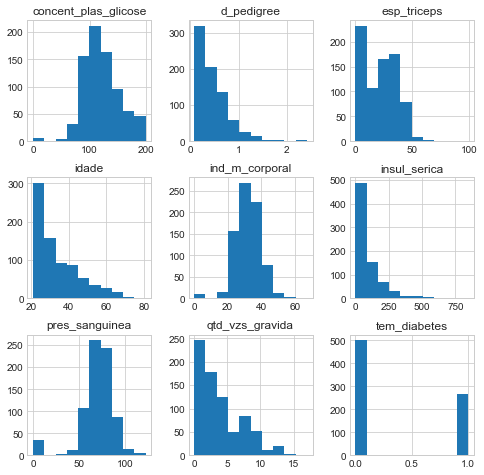

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(xlabelsize=10, ylabelsize=10, figsize=(8,8), sharex=False, sharey=False)
#plt.show()

#### 2.9 - gerar gráfico de DENSITY e interpretar a sua saída (como se uma linha estivesse passando sobre as barras do HISTOGRAM. Indica se a distribuição é simétrica (para direita) ou assimétrica (esquerda))

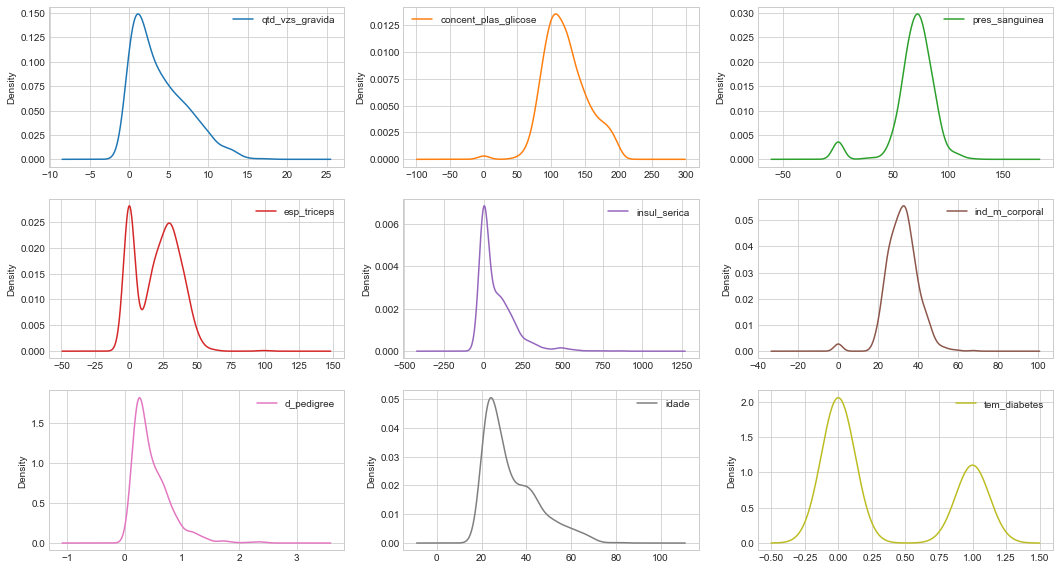

In [196]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, figsize=(18,10))
#parâmetro SHAREX indica se a escala do eixo X será igual para todos os subplots da área plotada! No caso, foi desabilitado.
plt.show()

#### 2.10 - gerar gráfico de BOXPLOT e interpretar a sua saída (identificar se os dados estão próximos da mediana 50%, se existem valores ouliers, etc)
Com os boxplots também podemos revisar a distribuição dos dados para cada atributo. A linha no centro (vermelho) é o valor da mediana (quartil 50%), a linha abaixo é o quartil 25% e a linha acima o quartil 75%. O boxplot ajuda a ter uma ideia da dispersão dos dados e os possíveis outliers.
Podemos ver que a dispersão dos dados é bem diferente entre os atributos. As colunas age, skin e test possuem uma simetria muito próxima a valores de dados menores.

qtd_vzs_gravida            AxesSubplot(0.125,0.657941;0.227941x0.222059)
concent_plas_glicose    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
pres_sanguinea          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
esp_triceps                AxesSubplot(0.125,0.391471;0.227941x0.222059)
insul_serica            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
ind_m_corporal          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
d_pedigree                    AxesSubplot(0.125,0.125;0.227941x0.222059)
idade                      AxesSubplot(0.398529,0.125;0.227941x0.222059)
tem_diabetes               AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

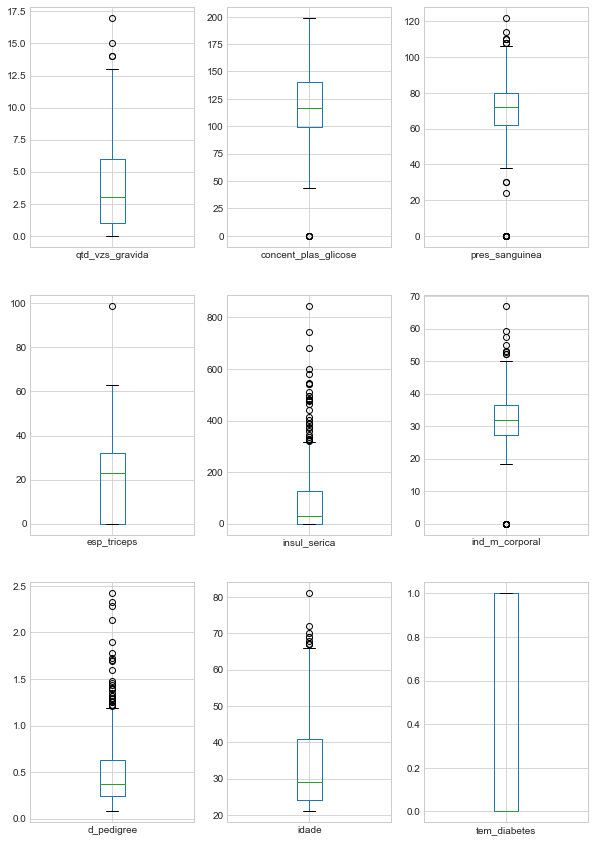

In [195]:
data.plot(kind='box', subplots=True, layout=(3,3), legend=True, figsize=(10,15))

#### 2.11 - gerar uma matrix de correlação com plotagem em gráfico (função corr do Pandas) COM o nome das variáveis nos eixos X e Y. Saber interpretar os resultados.

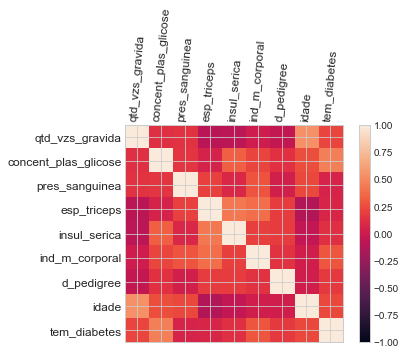

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

#variável values_corr aramzena a matriz de correlação
values_corr = data.corr()

#columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']

import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #describing the position of the subplot.
cax = ax.matshow(values_corr, vmin = -1, vmax = 1) #matshow -> exibe o array de valores de "values_corr" dentro do fig (plt.figure)
fig.colorbar(cax) #cax -> para cada valor do array, há uma cor correspondente. Valores próximo, tem cores "próximas" correspondentes
ticks = np.arange(0, 9, 1) #range da escala de valores. Sabendo que os valores de Corr ficam entre -1 e 1.
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels=columns, rotation=85, fontsize=12)
ax.set_yticklabels(labels=columns, fontsize=12)
plt.show()

#### 2.12 - gerar uma matrix de correlação com plotagem em gráfico (função corr do Pandas) SEM o nome das variáveis nos eixos X e Y. Saber interpretar os resultados.

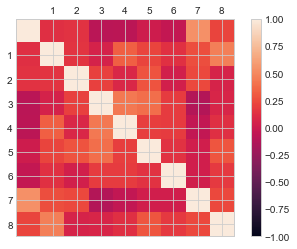

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

#variável values_corr aramzena a matriz de correlação
values_corr = data.corr()

#columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']

import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #describing the position of the subplot.
cax = ax.matshow(values_corr, vmin = -1, vmax = 1) #matshow -> exibe o array de valores de "values_corr" dentro do fig (plt.figure)
fig.colorbar(cax) #cax -> para cada valor do array, há uma cor correspondente. Valores próximo, tem cores "próximas" correspondentes
ticks = np.arange(1, 9, 1) #range da escala de valores.
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

#### 2.13 - gerar gráficos de scatterplot, relacionando todas as variáveis (analisar se as correlações são simétricas ou assimétricas)

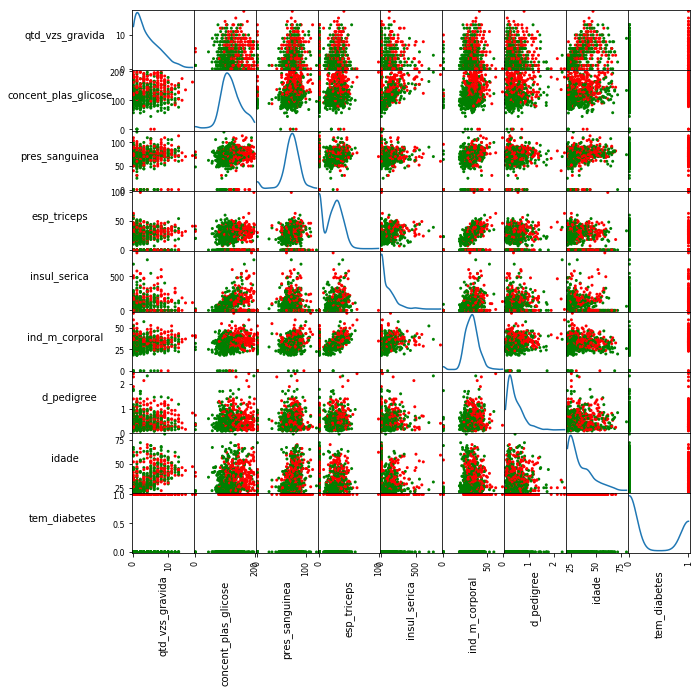

In [69]:
from pandas.plotting import scatter_matrix

colors = ['green','red'] #red = SEM ocorrência de diabetes | red = COM ocorrência de diabetes

axs = scatter_matrix(frame=data, figsize=(10, 10), alpha=1.0, diagonal='kde', marker='.', c=data.tem_diabetes.apply(lambda x:colors[x]))
qtd_columns = len(data.columns)

# o for abaixo serve para fazer uma rotação nas labels dos eixos "X" (90) e "Y"
for x in range(qtd_columns):
    for y in range(qtd_columns):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

#plt.show()

#### 2.14 - Gerar gráficos com SEABORN (mais usado em gráficos de apresentação, pois tem melhor acabamento)

#### 2.14.1 - Seaborn Pairplot (mostra o relacionamento entre as variáveis)

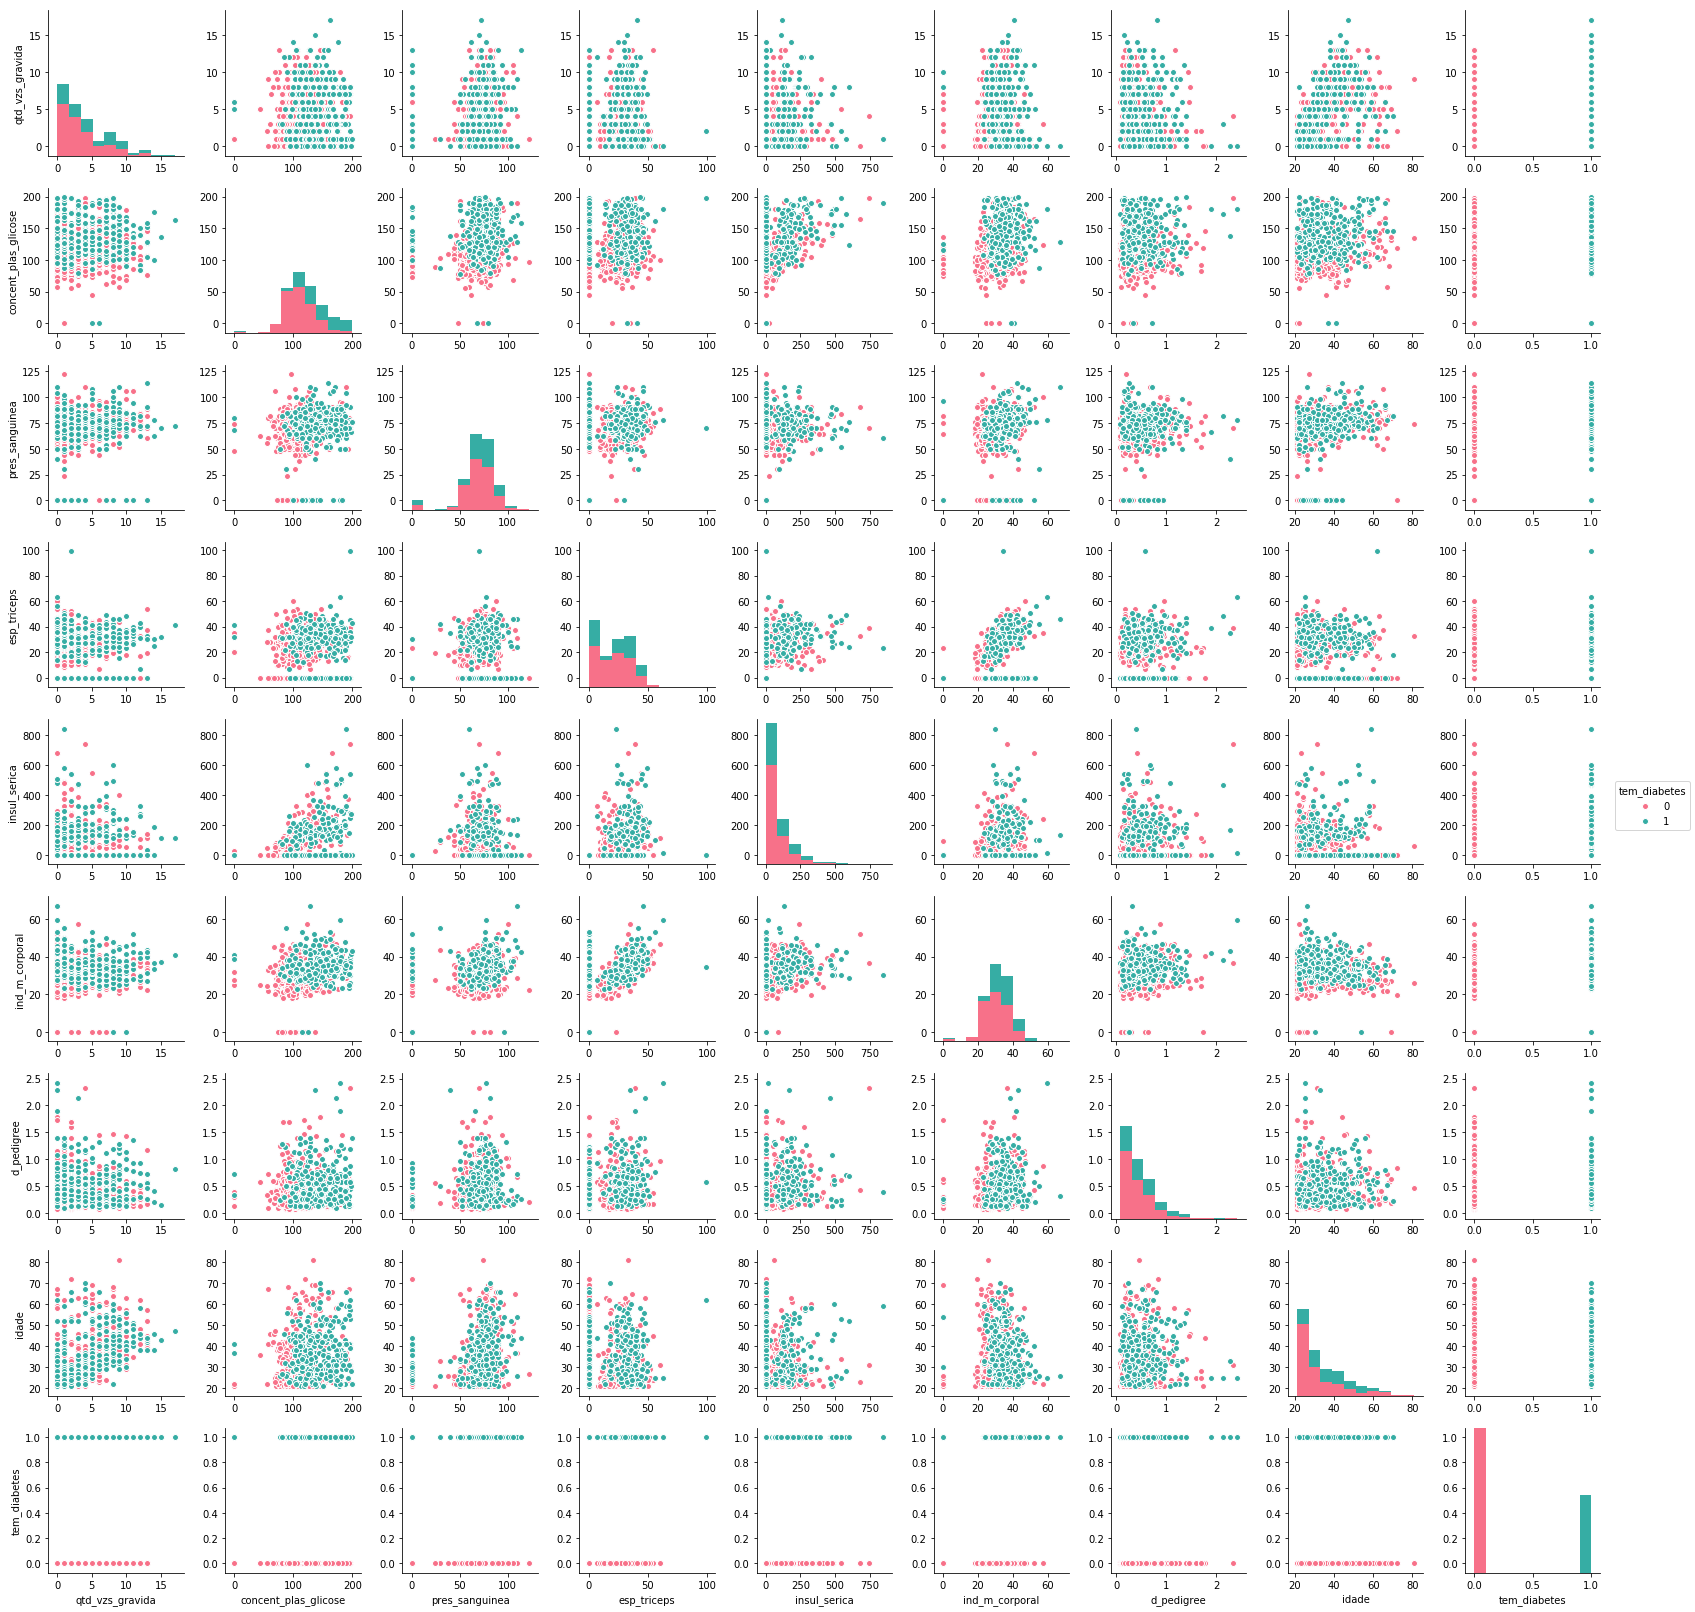

In [90]:
import seaborn as sns
sns.pairplot(data=data, hue="tem_diabetes", kind='scatter', palette="husl")

#### 2.14.2 - Seaborn Boxplot (plotando todas as variáveis em um único gráfico para comparativo)

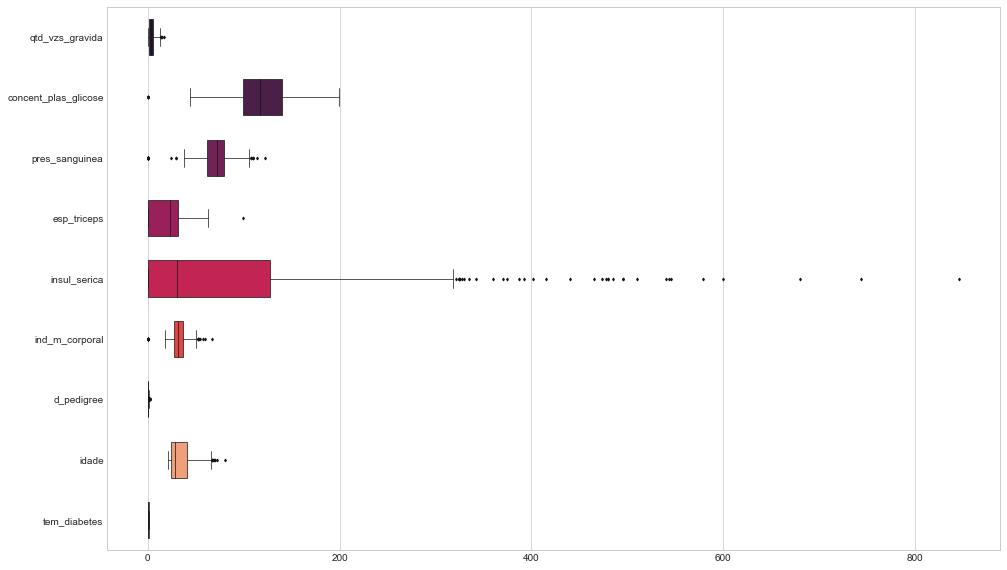

In [192]:
sns.set_style("whitegrid")

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 10)

boxplot = sns.boxplot(data=data, orient = "h", palette="rocket", width=0.6, fliersize=2, linewidth=0.7, saturation=0.9, ax=ax)

#### 2.14.3 - Seaborn Clustermap (mostra o relacionamento entre as variáveis)

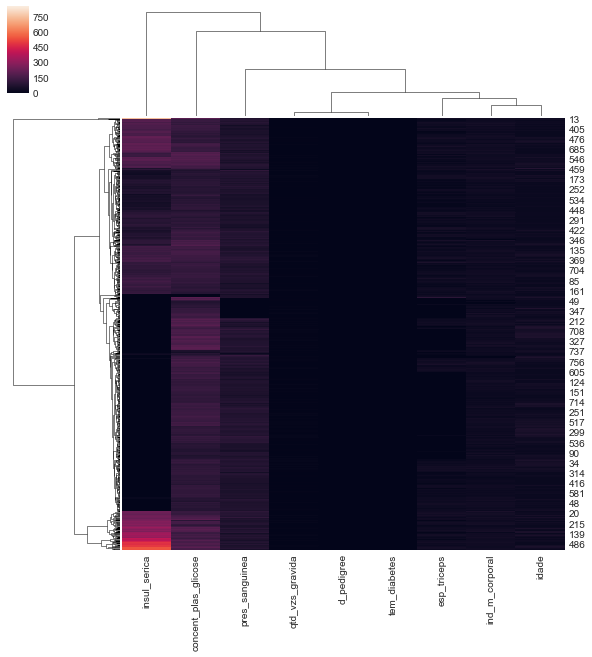

In [198]:
sns.clustermap(data=data)

#### 2.14.4 - Seaborn KdePlot (plot de DENSIDADE. Como as variáveis estão relacionadas e como isso se expande em uma escala numérica)

/opt/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


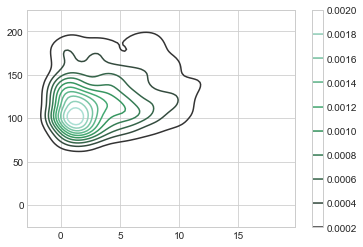

In [188]:
sns.kdeplot(data=data, cbar=True) #gráfico de densidade

#### 2.15 - Gerar gráfico de DISTRIBUIÇÃO (histogram) agregado com outro gráfico de DENSIDADE com SCIPY, utilizando método gaussiano (stats.sns.distplot - analisa a distribuição de uma das variáveis)

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2595: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


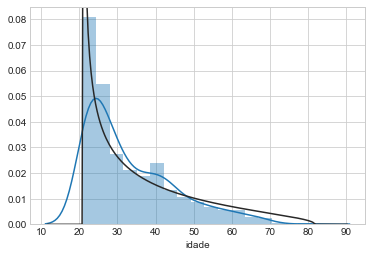

In [199]:
from scipy import stats
sns.distplot(data.idade, fit = stats.gausshyper);

## 3 - Pré-Processamento
    Preparação dos dados para o aprendizado de máquina.
    
    Problema? Cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados.
    Cabe ao cientista de dados preparar esses dados para entregá-los corretamente aos algoritmos.
    
    É uma boa prática criar diferentes visões e transformações dos dados, para que estes possam se comportar em
    diferentes algoritmos de Machine Learning, com intuito de testes. O modelo mais eficaz, provavelmente será o usado
    para resolver a problemática de negócio.
    
    Basicamente existem 4 técnicas para efetuar o PRÉ-PROCESSAMENTO dos dados. São estas: por escala, por normalização,
    por padronização e por binarização.

#### 3.1. Escala
Também conhecida como normalização. Objetivo é colocar os valores das variáveis dentro de um range entre 0 e 1, para que fiquem na mesma escala de valores.
- útil para otimização (gradient descent, regressão, redes neurais, e algoritmos que usa medidas de distância, como KNN).
- função de escala do scikit-learn: MinMaxScaler().

In [41]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')
print('Shape do dataframe [df]:', data.shape, '\n')
print('Imprimindo primeiros 5 registros do dataset:')
print(data.head(), '\n\n')

print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
var_preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')
print(var_preditoras, '\n\n')
print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
var_previsao = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')
#print(var_previsao, '\n\n')

print('Ajustando a ESCALA dos valores das variáveis PREDITORAS, ou seja, valores do array "var_preditoras"...', '\n')
scaler = MinMaxScaler(feature_range=(0,1)) #feature_range = faixa de valores que se irá trabalhar a escala
rescaled_var_preditoras = scaler.fit_transform(var_preditoras) #faz a transformação da escala dos valores das variáveis do subset "x"
print(rescaled_var_preditoras[0:5,:])

Shape do dataframe [df]: (768, 9) 

Imprimindo primeiros 5 registros do dataset:
   qtd_vzs_gravida  concent_plas_glicose  pres_sanguinea  esp_triceps  \
0                6                   148              72           35   
1                1                    85              66           29   
2                8                   183              64            0   
3                1                    89              66           23   
4                0                   137              40           35   

   insul_serica  ind_m_corporal  d_pedigree  idade  tem_diabetes  
0             0            33.6       0.627     50             1  
1             0            26.6       0.351     31             0  
2             0            23.3       0.672     32             1  
3            94            28.1       0.167     21             0  
4           168            43.1       2.288     33             1   


Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "conce

#### 3.2. Padronização
Para alguns algoritmos de aprendizado de máquina, caso os valores das variáveis de um dataset não se parecerem com um padrão normalmente distribuído (distribuição Gaussiana), o resultado da predição poderá ser impactado.

Para estes casos, a técnica de padronização soluciona. Ela simplesmente transforma os valores das variáveis de um dataset em uma DISTRIBUIÇÃO GAUSSIANA (normal), com a MÉDIA = 0 e DESVIO PADRÃO = 1.

- útil para regressão linear, regressão logística e linear discriminant analyses.
- bons resultados quando os dados das variáveis à serem padronizadas já estejam na mesma escala.
- função de padronização do scikit-learn: SandardScaler().

In [40]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')
print('Shape do dataframe [df]:', data.shape, '\n')
print('Imprimindo primeiros 5 registros do dataset:')
print(data.head(), '\n\n')

print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
var_preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')
print(var_preditoras, '\n\n')
print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
var_previsao = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')
#(var_previsao, '\n\n')

print('Ajustando a PADRONIZAÇÃO dos valores das variáveis PREDITORAS, ou seja, valores do array "var_preditoras"...', '\n')
scaler = StandardScaler().fit(var_preditoras) #feature_range = faixa de valores que se irá trabalhar a escala
standard_var_preditoras = scaler.transform(var_preditoras) #faz a transformação da escala dos valores das variáveis do subset "x"
print(standard_var_preditoras[0:5,:], '\n\n')

Shape do dataframe [df]: (768, 9) 

Imprimindo primeiros 5 registros do dataset:
   qtd_vzs_gravida  concent_plas_glicose  pres_sanguinea  esp_triceps  \
0                6                   148              72           35   
1                1                    85              66           29   
2                8                   183              64            0   
3                1                    89              66           23   
4                0                   137              40           35   

   insul_serica  ind_m_corporal  d_pedigree  idade  tem_diabetes  
0             0            33.6       0.627     50             1  
1             0            26.6       0.351     31             0  
2             0            23.3       0.672     32             1  
3            94            28.1       0.167     21             0  
4           168            43.1       2.288     33             1   


Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "conce

#### 3.3. Normalização
Ajusta a escala de cada observação (valor das variáveis, posição Linha[i] X Coluna[j]), para que tenha comprimento = 1.

Quando temos datasets ESPARSOS (com muitos zeros) e atributos com ESCALA MUITO VARIADA, a técnica de normalização é indicada.

- útil para algoritmos de redes neurais
- algoritmos que usam medida de distância (KNN)
- função de normalização do scikit-learn: Normalizer().

In [46]:
from pandas import read_csv
from sklearn.preprocessing import Normalizer

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')
print('Shape do dataframe [df]:', data.shape, '\n')
print('Imprimindo primeiros 5 registros do dataset:')
print(data.head(), '\n\n')

print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
var_preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')
print(var_preditoras, '\n\n')
print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
var_previsao = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')
#print(var_previsao, '\n\n')

print('Ajustando a PADRONIZAÇÃO dos valores das variáveis PREDITORAS, ou seja, valores do array "var_preditoras"...', '\n')
normalizer = Normalizer().fit(var_preditoras) #feature_range = faixa de valores que se irá trabalhar a escala
normalizer_var_preditoras = normalizer.transform(var_preditoras) #faz a transformação da escala dos valores das variáveis do subset "x"
print(normalizer_var_preditoras[0:5,:], '\n\n')

Shape do dataframe [df]: (768, 9) 

Imprimindo primeiros 5 registros do dataset:
   qtd_vzs_gravida  concent_plas_glicose  pres_sanguinea  esp_triceps  \
0                6                   148              72           35   
1                1                    85              66           29   
2                8                   183              64            0   
3                1                    89              66           23   
4                0                   137              40           35   

   insul_serica  ind_m_corporal  d_pedigree  idade  tem_diabetes  
0             0            33.6       0.627     50             1  
1             0            26.6       0.351     31             0  
2             0            23.3       0.672     32             1  
3            94            28.1       0.167     21             0  
4           168            43.1       2.288     33             1   


Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "conce

#### 3.4. Binarização
Converte os valores do dataset entre as possibilidades "0" e "1" com base em uma regra pré-determinada.

técnica de BINARIZING -> à partir da definição de um valor threshold (valor limiar ou margem limite), podemos definir que todos os valores ACIMA do THRESHOLD serão marcados como sendo "1", e todos os valores IGUAIS ou ABAIXO do THRESHOLD serão marcados como sendo "0".

- útil quando probabilidades e queremos transformar dados em algo mais significativo.
- função de normalização do scikit-learn: Binarizer().

In [49]:
from pandas import read_csv
from sklearn.preprocessing import Binarizer

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')
print('Shape do dataframe [df]:', data.shape, '\n')
print('Imprimindo primeiros 5 registros do dataset:')
print(data.head(), '\n\n')

print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
var_preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')
print(var_preditoras, '\n\n')
print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
var_previsao = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')
#print(var_previsao, '\n\n')

print('Ajustando a BINARIZAÇÃO dos valores das variáveis PREDITORAS, ou seja, valores do array "var_preditoras"...', '\n')
THRESHOLD = 5.0
print('THRESHOLD definido (se valor > THRESHOLD = 1; se valor <= THRESHOLD = 0):', THRESHOLD, '\n')
binarizer = Binarizer(threshold = THRESHOLD).fit(var_preditoras) #feature_range = faixa de valores que se irá trabalhar a escala
binarizing_var_preditoras = binarizer.transform(var_preditoras) #faz a transformação da escala dos valores das variáveis do subset "x"
print(binarizing_var_preditoras[0:5,:], '\n\n')

Shape do dataframe [df]: (768, 9) 

Imprimindo primeiros 5 registros do dataset:
   qtd_vzs_gravida  concent_plas_glicose  pres_sanguinea  esp_triceps  \
0                6                   148              72           35   
1                1                    85              66           29   
2                8                   183              64            0   
3                1                    89              66           23   
4                0                   137              40           35   

   insul_serica  ind_m_corporal  d_pedigree  idade  tem_diabetes  
0             0            33.6       0.627     50             1  
1             0            26.6       0.351     31             0  
2             0            23.3       0.672     32             1  
3            94            28.1       0.167     21             0  
4           168            43.1       2.288     33             1   


Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "conce

## 4 - Feature Selection
Atua na identificação de variáveis que influênciam no resultado de um processo de modelagem preditiva. Atributos irrelevante terão impacto negativo na performance, enquanto atributos colineares podem afetar o grau de acurácia do modelo. O Scikit-learn possui funções que automatizam o trabalhao de extração e seleção de variáveis.

A etapa de Feature Selection é onde selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras. O Feature Selection nos ajuda a reduzir o overfitting (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.

-> Não é uma boa prática fazer a etapa de feature selection antes do pré-processamento, pois suas variáveis já estarão na mesma escala, normalizadas e padronizadas, o que facilitaria o trabalho das funções na hora que elas tiverem que selecionar as melhores variáveis como possíveis variáveis preditoras.

#### 4.1. Seleção Univariada
Para selecionar os atributos que mais fortemente se correlacionam com a variável que estamos tentando prever, diversas técnicas estatísticas podem ser usadas. Um delas é o TESTE DO QUI-QUADRADO.

- função de normalização do scikit-learn: SelectKBest().

In [70]:
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #em inglês = Chi-Squared, teste Qui-Quadrado

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')
print('Imprimindo 5 primeiras observações do DataFrame...', '\n')
print(data.head(5))

print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
var_preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')
#print(var_preditoras, '\n\n')
print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
var_previsao = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Extração de Variáveis
selection = SelectKBest(score_func=chi2, k = 4) #"score_func"= método de seleção das variáveis | k = "qtd. variáveis"
print('Pega-se todas as variáveis preditoras, guarda-se em um variável [var_preditoras]. Aplica-se então um teste')
print('estatístico que no caso é o Qui-Quadrado, e seleciona-se as 4 melhores (com maior score) que irão ajudar a prever')
print('o valor da variável de previsão [var_previsao].', '\n')

print('#fit = aplicando a seleção de variáveis preditoras, onde estas sejam boas candidatas em relação à variável.')
print('que queremos prever.', '\n')
fit = selection.fit(var_preditoras, var_previsao)  

#Score
print('-> Score <-')
print(fit.scores_, '\n')

#Atributos relacionados
features_selection = fit.transform(var_preditoras)
print('-> Atributos relacionados <-')
print(features_selection[0:5,:])

Imprimindo 5 primeiras observações do DataFrame... 

   qtd_vzs_gravida  concent_plas_glicose  pres_sanguinea  esp_triceps  \
0                6                   148              72           35   
1                1                    85              66           29   
2                8                   183              64            0   
3                1                    89              66           23   
4                0                   137              40           35   

   insul_serica  ind_m_corporal  d_pedigree  idade  tem_diabetes  
0             0            33.6       0.627     50             1  
1             0            26.6       0.351     31             0  
2             0            23.3       0.672     32             1  
3            94            28.1       0.167     21             0  
4           168            43.1       2.288     33             1  
Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguin

#### 4.2. Eliminação Recursiva de Atributos
Essa técnica utiliza a acurácia de um modelo preditivo para identificar os atributos que mais contribuem para prever a variável alvo. Ela opera removendo recursivamente os atributos, construindo o modelo com os atributos remanescentes.

- RFE - Recursive Feature Selection

In [103]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression #em inglês = Chi-Squared, teste Qui-Quadrado

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
var_preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
var_previsao = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Criando o modelo de Machine Learning através de uma chamada à função, usando Regressão Logística
model = LogisticRegression()

#A partir do modelo de ML criado, usaremos sobre este a técnica de RFE - Recursive Feature Selection
FeatureSelection = RFE(estimator=model, n_features_to_select=3) #estimator = sobre qual modelo estimar as feature
                                                                #n_features_to_select = qtd features para selecionar

#aplicando o resultado da recursão (RFE) aos dois conjuntos: variáveis preditoras [var_preditoras] e variáveis previsoras [var_previsao].
fit = FeatureSelection.fit(var_preditoras, var_previsao)

#imprimindo resultado da seleção das features...
print('-> Colunas do DataFrame:', list(data.columns[0:8]), '\n')
print('-> Qtd total de colunas do DataFrame:', data.columns[0:8].size, '\n')
print('-> Número de atributos para seleção: %d' % fit.n_features_, '\n')
print('-> Atributos selecionados %s' % fit.support_, '\n')
print('-> Ranking de todos os atributos %s' % fit.ranking_, '\n')

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

-> Colunas do DataFrame: ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade'] 

-> Qtd total de colunas do DataFrame: 8 

-> Número de atributos para seleção: 3 

-> Atributos selecionados [ True False False False False  True  True False] 

-> Ranking de todos os atributos [1 2 3 5 6 1 1 4] 



#### 4.3. Método de Ensemble para seleção de variáveis
Estima a importância de cada atributo através da construção de árvores de decisão usando sub-amostras do conjunto de dados. Retorna um score para cada atributo, onde as variáveis com maior pontuação são as variáveis candidatas a variáveis preditoras.

- utiliza a função sklearn.ensemble.ExtraTreesClassifier()

In [109]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
var_preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
var_previsao = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Criando o modelo para a Feature Selection (usando árvore de decisão)
model = ExtraTreesClassifier()
model.fit(var_preditoras, var_previsao)

#imprimindo resultado da seleção das features...
print('-> Candidatas a variáveis preditoras:', list(data.columns[0:8]), '\n')
print('Imprimindo o score das variáveis', model.feature_importances_)

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

-> Candidatas a variáveis preditoras: ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade'] 

Imprimindo o score das variáveis [ 0.10013804  0.2211008   0.09964788  0.08171725  0.07239577  0.14894933
  0.12271105  0.15333988]


## 5. Redução de Dimensionalidade

### 5.1. Principal Component Analyses (PCA)

Não é um recursos de Feature Selection. Mais precisamente, PCA representa FEATURE EXTRACTION (extração de atributos), no formato de componentes.

PCA é a forma comprimida de transformar um dataset altamente dimensional em componentes principais, através do uso da álgebra linear. Esse processo é também conhecido como Reduçao da Dimensionalidade.

Objetivo: dado um dataset com um grande número de variáveis, reduzir esse volume de variáveis para componentes principais. Não é uma remoção de variáveis, e sim combinação lineares (álgebra linear) de "N" atributos do dataset para criar componentes. Ela permite extrair um número pequeno de conjuntos dimensionais de um dataset altamente dimnensional (800 variáveis ou mais, dependendo da sua fonte de dados ou daquilo que se quer resolver).

Usar PCA quando tiver 3 ou mais dimensões para criar os respectivos componenetes.

In [112]:
# Origem do artigo: http://www.nlpca.org/pca_principal_component_analysis.html
# Origem da imagem: http://www.nlpca.org/fig_pca_principal_component_analysis.png

from IPython.display import Image
Image(url = 'http://www.nlpca.org/fig_pca_principal_component_analysis.png')

Observe que os componentes PC1 e PC2 representam o "Principal Component" 1 e 2. São uma combinação linear de várias outras variáveis, dado uma série de cálculos matemáticos (álgebra linear), onde o tanto o PC1 quanto o PC2 são componentes que representam um conjunto de variáveis.

No exemplo a cima, foi reduzido de 3 atributos para 2 dimensões, sendo que essas 2 dimensões são componentes que representam os 3 atributos (Gene 1, Gene 2, Gene 3).

PC1 -> captura a VARIABILIDADE ENTRE UM CONJUNTO DE VARIÁVEIS (atributos). É a combinação linear dos atributos com MÁXIMA VARIÂNCIA e determina a direção em que há mais alta variabilidade dos dados.

PC2 -> captura a VARIABILIDADE COM OUTRAS VARIÁVEIS REMANESCENTES.

Todos os demais componentes subsequentes possuem o mesmo conceito.

Em outras palavras, a correlação entre o primeiro componente e o segundo deverá ser ZERO.

In [113]:
# Origem da documentação: http://scikit-learn.sourceforge.net/0.6/modules/decompositions.html
# Origem da documentação: http://scikit-learn.sourceforge.net/0.6/auto_examples/plot_pca.html
# Origem da imagem: http://scikit-learn.sourceforge.net/0.6/_images/plot_pca1.png

from IPython.display import Image
Image(url = 'http://scikit-learn.sourceforge.net/0.6/_images/plot_pca1.png')

PCA necessita (não obrigatório, mas altamente recomendado!) que os dados estejam NORMALIZADOS.

Ela se usa a técnica da ESTATÍSTICA MULTIVARIADA, que transforma um conjunto de variáveis originais em outro conjunto de variáveis denominadas componentes principais.

Características de cada componente gerado:

- cada componente principal é uma combinação linear de todas as variáveis originais
- são independentes entre si (Se os dados forem normalmente distribuídos (conjuntamente))
- estimados com o propósito de reter o máximo de informação, em termos da VARIAÇÃO CONTIDA nos dados

A distribuição dos componentes é observada nos eixos originais, considerando o conjunto de eixos ortogonais não correlacionados (grupos de dados não se relcionam!).

O agrupamento das observações em relação às variáveis (atributos) é feita com base nas suas variações, ou seja, com base na variação de suas características. Características em comum, formam um grupo de observações, que logo originará um componente principal.

---> COMPONENTES PRINCIPAIS = VARIÁVEIS COMPOSTAS

---> quanto > a VARIÂNCIA, > a informação contida naquele componente.

In [187]:
from pandas import read_csv
from sklearn.decomposition import PCA

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
var_preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
var_previsao = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#
principal_componente = PCA(n_components=3) # n_components -> quantidade de componentes resultantes
fit = principal_componente.fit(var_preditoras) # "ajustar" de 8 variáveis preditoras originais para 3 componentes

#imprimindo resultado da FEATURE EXTRACTION...
print('--->>> Reduzindo de', var_preditoras.itemsize, 'variáveis (ORIGINAIS) para', fit.n_components_, 'COMPONENTES PRINCIPAIS. <<<---', '\n')
print('-> Variância dos 3 COMPONENTES gerados:', fit.explained_variance_ratio_, '\n')
print('Leitura da VARIÂNCIA dos COMPONENTES é a seguinte:', '\n')
print('O COMPONENTE 1 gerado, foi capaz de EXPLICAR' ,fit.explained_variance_ratio_[fit.n_components_-3] * 100, '% da VARIABILIDADE DOS DADOS.')
print('O COMPONENTE 2 gerado, foi capaz de EXPLICAR' ,fit.explained_variance_ratio_[fit.n_components_-2] * 100, '% da VARIABILIDADE DOS DADOS.')
print('O COMPONENTE 3 gerado, foi capaz de EXPLICAR' ,fit.explained_variance_ratio_[fit.n_components_-1] * 100, '% da VARIABILIDADE DOS DADOS.', '\n')

percent_total_variancia = (fit.explained_variance_ratio_[fit.n_components_-3] + fit.explained_variance_ratio_[fit.n_components_-2] + fit.explained_variance_ratio_[fit.n_components_-1]) * 100

print('Cerca de', percent_total_variancia, '% da VARIABILIDADE DOS DADOS pode ser explicada pelos 3 componentes gerados, em relação ao dataset avaliado.', '\n')

print('Valores do COMPONENTE 1:')
print(fit.components_[0], '\n')
print('Valores do COMPONENTE 2:')
print(fit.components_[1], '\n')
print('Valores do COMPONENTE 3:')
print(fit.components_[2])

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

--->>> Reduzindo de 8 variáveis (ORIGINAIS) para 3 COMPONENTES PRINCIPAIS. <<<--- 

-> Variância dos 3 COMPONENTES gerados: [ 0.88854663  0.06159078  0.02579012] 

Leitura da VARIÂNCIA dos COMPONENTES é a seguinte: 

O COMPONENTE 1 gerado, foi capaz de EXPLICAR 88.8546634576 % da VARIABILIDADE DOS DADOS.
O COMPONENTE 2 gerado, foi capaz de EXPLICAR 6.15907837459 % da VARIABILIDADE DOS DADOS.
O COMPONENTE 3 gerado, foi capaz de EXPLICAR 2.57901189177 % da VARIABILIDADE DOS DADOS. 

Cerca de 97.5927537239 % da VARIABILIDADE DOS DADOS pode ser explicada pelos 3 componentes gerados, em relação ao dataset avaliado. 

Valores 

## 6. Resampling
Se baseia na divisão do dataset para criação, teste e AVALIAÇÃO do modelo. Essa divisão deve ser muito criteriosa, uma vez que uma amostragem de dados pode ser insuficiente para treinar o seu modelo para os mais diversos cenários de predição. O que acarretará em predições ineficientes.

Divisão  dos dados em:
- Dados de TREINO
- Dados de TESTE

Validação cruzada do modelo preditivo:
- CROSS VALIDATION

### 6.1. Dados de Treino e de Teste
Divisão ALEATÓRIA dos dados em:
- Dados de TREINO -> treinamento do modelo preditivo.
- Dados de TESTE -> faz a previsão dos dados e avalia-se os resultados.
- Divisões usuais: 70/30 (treino/teste) e 65/35 (treino/teste).
- Método veloz para grandes conjuntos de dados, porém, pode haver alta variância nos resultados.

In [253]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Definição do tamanho das amostras
test_size = 0.33 # 33% dos valores do dataset serão destinado à TESTE

#Garante que os resultados podem ser reproduzidos
#Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7 #"semente" = if int, is the seed used by the random number generator.

print('FUNÇÃO train_test_split do PACOTE cross_validation: retorna valores de treino e de teste para as variáveis "preditoras" e variável "alvo"...', '\n')
preditoras_treino, preditoras_teste, alvo_treino, alvo_teste = cross_validation.train_test_split(
                                                                                         preditoras
                                                                                        ,alvo
                                                                                        ,test_size = test_size #tamanho do conjunto de teste: 33%
                                                                                        ,random_state = seed #semente
                                                                                        )

print('Gerando as variáveis: \n->preditoras_treino\n->preditoras_teste\n->alvo_treino\n->alvo_teste\n')

#Gerando modelo de regressão logísitca, passando valores das variáveis de TREINO...
modelo = LogisticRegression()
modelo.fit(preditoras_treino, alvo_treino)

result_test = modelo.score(preditoras_teste, alvo_teste)
print('----------------> Acurácia <----------------')
print('MÉDIA:%.2f%%' % (result_test * 100.00)) # ou poderíamos chamado o valor de: result_test.mean()

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

FUNÇÃO train_test_split do PACOTE cross_validation: retorna valores de treino e de teste para as variáveis "preditoras" e variável "alvo"... 

Gerando as variáveis: 
->preditoras_treino
->preditoras_teste
->alvo_treino
->alvo_teste

----------------> Acurácia <----------------
MÉDIA:75.59%


### 6.2. CROSS VALIDATION
Técnica de validação cruzada de um modelo com menos variância que a técnica de DIVIDIR OS DADOS EM TREINO/TESTE. Apesar disso, é uma técnica que utiliza maior recursos computacionais.

Basicamente se definie um número de "FOLD's" (dobra) que se deseja dividir o conjunto de dados. A quantidade de "DOBRAS" será a quantidade de blocos de testes que o modelo irá executar.

In [235]:
# Origem : https://medium.com/@patcharinI/k-fold-cross-validation-4f0ae36341a1
# Origem da imagem: https://cdn-images-1.medium.com/max/1600/1*7DzWHSo6AyFjU4K39-8BMA.png

from IPython.display import Image
print('\nA imagem abaixo exibe 5 FOLD"s por ITERAÇÃO. Para cada ITERAÇÃO, há 5 DOBRAS com AMOSTRAGENS DIFERENTES tanto para TREINO')
print('quanto para TESTE. A grande sacada para DIMINUIR A VARIÂNCIA é justamente a amostragem aleatória de dados com base nas')
print('DOBRAS (divisões aleatórias no conjunto de dados do dataset).')
Image(url = 'https://cdn-images-1.medium.com/max/1600/1*7DzWHSo6AyFjU4K39-8BMA.png')


A imagem abaixo exibe 5 FOLD"s por ITERAÇÃO. Para cada ITERAÇÃO, há 5 DOBRAS com AMOSTRAGENS DIFERENTES tanto para TREINO
quanto para TESTE. A grande sacada para DIMINUIR A VARIÂNCIA é justamente a amostragem aleatória de dados com base nas
DOBRAS (divisões aleatórias no conjunto de dados do dataset).


In [380]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LogisticRegression()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzadda.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

----------------> Acurácia <----------------
MÉDIA:76.95%      DESVIO PADRDÃO:4.84%


## 7. Avaliando a Performance
Avaliando o quão bom ou o quão preciso é o modelo gerado.

### 7.1. Métricas para Algorítmos de Regressão

#### 7.1.1. ACURÁCIA
Número de previsões corretas dentro do modelo gerado. Quando existir o MESMO NÚMERO DE OBSERVAÇÕES EM CADA CLASSE, ela é últil.

In [379]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LogisticRegression()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzadda.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'accuracy' # esse parâmetro define qual a MÉTRICA QUE SERÁ USADA
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

----------------> Acurácia <----------------
MÉDIA:76.95%      DESVIO PADRDÃO:4.84%


#### 7.1.2. CURVA ROC
Consegue-se medir o nível de previsões do modelo, que gera uma curva, onde a área abaixo da curva gera um índice (onde a partir desta, efetua-se a análise deste modelo).

Métrica usada em problemas de classificação binária (TRUE ou FALSE, 1 ou 0, M ou F, etc), que são um trade-off entre SENSITIVITY e SPECIFICITY.

- SENSITIVITY -> taxa de verdadeiros positivos (TVP). Número de instâncias da PRIMEIRA classe que foram previstas corretamente.
- SPECIFICITY -> taxa de veradeiros negativos (TVN). Número de instâncias da SEGUNDA classe que foram previstas corretamente.

Métroca da Curva ROC com TAXA > 0.5, aponta taxa de previsão.

De acordo com o resultado dessa métrica (Curva ROC), estará sendo avaliado se quer mais precisão na TAXA DE VERDADEIROS POSITIVOS ou na sua TAXA DE VERDADEIROS NEGATIVOS.

No exemplo à seguir, segue classificação binária da classe:
- Se valor da classe = 1 -> COM DIABTES
- Se valor da classe = 0 -> SEM DIABETES

In [378]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LogisticRegression()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzadda.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'roc_auc' # esse parâmetro define qual a MÉTRICA QUE SERÁ USADA
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

print('Problemas à resolver:\n- Qual a taxa de VERDADEIROS POSITIVOS (pessoas que de fato tem diabetes)\n- Qual a taxa de VERDADEIROS NEGATIVOS (pessoas que de fato não tem diabetes)\n')


#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

Problemas à resolver:
- Qual a taxa de VERDADEIROS POSITIVOS (pessoas que de fato tem diabetes)
- Qual a taxa de VERDADEIROS NEGATIVOS (pessoas que de fato não tem diabetes)

----------------> Acurácia <----------------
MÉDIA:82.34%      DESVIO PADRDÃO:4.07%


#### 7.1.3. Matrix de Confusão
Permite verificar a acurácia de um modelo COM DUAS CLASSES.

In [377]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Definição do tamanho das amostras
test_size = 0.33

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

print('FUNÇÃO train_test_split do PACOTE cross_validation: retorna valores de treino e de teste para as variáveis "preditoras" e variável "alvo"...', '\n')
preditoras_treino, preditoras_teste, alvo_treino, alvo_teste = cross_validation.train_test_split(
                                                                                         preditoras
                                                                                        ,alvo
                                                                                        ,test_size = test_size #tamanho do conjunto de teste: 33%
                                                                                        ,random_state = seed #semente
                                                                                        )

print('Gerando as variáveis: \n->preditoras_treino\n->preditoras_teste\n->alvo_treino\n->alvo_teste\n')

#Gerando modelo de regressão logísitca, passando valores das variáveis de TREINO...
model = LogisticRegression()
model.fit(preditoras_treino, alvo_treino)

#Gerando as predições com os dados de TESTE
previsions = model.predict(preditoras_teste) #efetua as previsões com os dados de TESTE, dividido anteriormente com o train_test_split
matrix = confusion_matrix(alvo_teste, previsions) #passa os dados ORIGINAIS de TESTE da variável ALVO e cruza com as previões do MODELO armazenadas na variável "previsions"

print('----------------> Acurácia <----------------')
print('Matriz de Confusão:\n', matrix, '\n')
print('VERDADEIRO POSITIVO (1º CLASSE):', matrix[0,0])
print('FALSO POSITIVO (1º CLASSE):', matrix[0,1])
print('FALSO NEGATIVO (2º CLASSE):', matrix[1,0])
print('VERDADEIRO NEGATIVO (2º CLASSE):', matrix[1,1], '\n')

total_amostras_teste = matrix.sum()
print('Total de Amostras para TESTE de PREDIÇÃO:', total_amostras_teste)

qtd_acertos = (matrix[0,0] + matrix[1,1])
percent_acertos = (qtd_acertos/total_amostras_teste)*100
print('Quantidade de ACERTOS do modelo: %d (%.2f%%)' % (qtd_acertos, percent_acertos))

qtd_erros = (matrix[0,1] + matrix[1,0])
percent_erros = (qtd_erros/total_amostras_teste)*100
print('Quantidade de ERROS do modelo: %d (%.2f%%)' % (qtd_erros, percent_erros))

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

FUNÇÃO train_test_split do PACOTE cross_validation: retorna valores de treino e de teste para as variáveis "preditoras" e variável "alvo"... 

Gerando as variáveis: 
->preditoras_treino
->preditoras_teste
->alvo_treino
->alvo_teste

----------------> Acurácia <----------------
Matriz de Confusão:
 [[141  21]
 [ 41  51]] 

VERDADEIRO POSITIVO (1º CLASSE): 141
FALSO POSITIVO (1º CLASSE): 21
FALSO NEGATIVO (2º CLASSE): 41
VERDADEIRO NEGATIVO (2º CLASSE): 51 

Total de Amostras para TESTE de PREDIÇÃO: 254
Quantidade de ACERTOS do modelo: 192 (75.59%)
Quantidade de ERROS do modelo: 62 (24.41%)


#### 7.1.4. Perda Logarítmica
Avalia as previsões de probabilidade de um membro pertencer a uma determinada classe.

Quanto < os valores deste indicador, melhor a performance (sendo 0 perfeito logloss).

Obs.: usado com a CROSS VALIDATION (cross_validation.cross_val_score)

In [374]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LogisticRegression()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzadda.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'log_loss' # esse parâmetro define qual a MÉTRICA QUE SERÁ USADA
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('----------------> Logarithmic Loss <----------------')
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

----------------> Acurácia <----------------
----------------> Logarithmic Loss <----------------
MÉDIA:-49.27%      DESVIO PADRDÃO:4.69%


#### 7.1.5. Relatório de Classificação

In [383]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"...', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)
print('Object Type [var_preditoras]:', type(var_preditoras), '\n')

print('Criando um array "var_previsao" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)
print('Object Type [var_previsao]:', type(var_previsao), '\n')

#Definição do tamanho das amostras
test_size = 0.33

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

print('FUNÇÃO train_test_split do PACOTE cross_validation: retorna valores de treino e de teste para as variáveis "preditoras" e variável "alvo"...', '\n')
preditoras_treino, preditoras_teste, alvo_treino, alvo_teste = cross_validation.train_test_split(
                                                                                         preditoras
                                                                                        ,alvo
                                                                                        ,test_size = test_size #tamanho do conjunto de teste: 33%
                                                                                        ,random_state = seed #semente
                                                                                        )

print('Gerando as variáveis: \n->preditoras_treino\n->preditoras_teste\n->alvo_treino\n->alvo_teste\n')

#Gerando modelo de regressão logísitca, passando valores das variáveis de TREINO...
model = LogisticRegression()
model.fit(preditoras_treino, alvo_treino) #treinando o modelo

#Gerando as predições com os dados de TESTE
previsions = model.predict(preditoras_teste) #efetua as previsões com os dados de TESTE, dividido anteriormente com o train_test_split
report = classification_report(alvo_teste, previsions) #passa os dados ORIGINAIS de TESTE da variável ALVO e cruza com as previões do MODELO armazenadas na variável "previsions"

#Imprimindo o report de classificação
print(report)

Criando um array "var_preditoras" com os dados das qtd_vzs_gravida", "concent_plas_glicose", "pres_sanguinea", "esp_triceps", "insul_serica", "ind_m_corporal", "d_pedigree", "idade"... 

Object Type [var_preditoras]: <class 'numpy.ndarray'> 

Criando um array "var_previsao" com os dados da coluna "tem_diabetes"... 

Object Type [var_previsao]: <class 'numpy.ndarray'> 

FUNÇÃO train_test_split do PACOTE cross_validation: retorna valores de treino e de teste para as variáveis "preditoras" e variável "alvo"... 

Gerando as variáveis: 
->preditoras_treino
->preditoras_teste
->alvo_treino
->alvo_teste

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



### 7.2. Métricas para Algorítmos de Regressão

#### 7.2.1 Mean Error (Erro Médio)

- o valor das previsões do modelo de regressão raramente é igual ao valor real (devido às variações aleatórias que caracterizam a variável).

- apesar do citada acima, o cenário não deve interferir muito na média dos valores reais ao longo dos períodos. Logo, a previsão do modelo não deve ser tendenciosa.

- O ERRO MÉDIO deve ser muito próximo de zero caso o modelo de previsão esteja "calibrado".

- O ERRO MÉDIO é calculado pela SOMA DOS ERROS DE PREVISÃO de uma série de períodos e dividindo essa soma pelo número de erros usados para calcular a soma.

Sabendo que qual o ERRO MÉDIO de um modelo de regressão, conseguimos calcular as demais métricas à seguir:

#### 7.2.2. MAE - Mean Absolute Error (Erro Médio Absoluto) or Mean Absolute Deviation (Desvio Médio Absluto)
Caracteriza-se pela média dos erros cometidos pelo modelo de previsão durante uma série de períodos de tempo.

Cálculo: é soma da diferença absoluta entre todas as PREVISÕES e VALORES REAIS dividido pelo número de valores que foram usados para obter a soma.

Quanto mais próximo de zero essa métrica, mais próximo da perfeição está a previsão.

Link de apoio: https://pt.wikibooks.org/wiki/Log%C3%ADstica/T%C3%A9cnicas_de_previs%C3%A3o/Medidas_de_precis%C3%A3o_da_previs%C3%A3o

Será o usado o DataSet à seguir:

-> Boston Houses

Link dados: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

Link Descrição: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

-> Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

-> Attribute Information:

- CRIM      per capita crime rate by town
- ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS     proportion of non-retail business acres per town
- CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX       nitric oxides concentration (parts per 10 million)
- RM        average number of rooms per dwelling
- AGE       proportion of owner-occupied units built prior to 1940
- DIS       weighted distances to five Boston employment centres
- RAD       index of accessibility to radial highways
- TAX      full-value property-tax rate per 10.000,00 dolares
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    percent lower status of the population
- MEDV     Median value of owner-occupied homes in 1.000,00 dolares

In [385]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT, MEDV', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LinearRegression()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzadda.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_absolute_error' # esse parâmetro define qual a MÉTRICA QUE SERÁ USADA
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('----------------> MAE - Mean Absolute Error (Erro Médio Absoluto) <----------------')
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()), (result.std())))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT, MEDV 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------
----------------> MAE - Mean Absolute Error (Erro Médio Absoluto) <----------------
MÉDIA:-4.00%      DESVIO PADRDÃO:2.08%


#### 7.2.3. MSE - Mean Squared Error (Erro Médio Quadrático) or Mean Squared Deviation (Desvio Médio Quadrático)
Caracteriza-se pela média da MAGNITUDE dos erros cometidos pelo modelo de previsão durante uma série de períodos de tempo.

Cálculo: é soma da diferença absoluta entre todas as PREVISÕES e VALORES REAIS elevadas ao quadrado. Esse valor ainda é  dividido pelo número de valores que foram usados para obter a soma.

Quanto mais próximo de zero essa métrica, mais próximo da perfeição está a previsão.

In [386]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT, MEDV', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LinearRegression()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzadda.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_squared_error' # esse parâmetro define qual a MÉTRICA QUE SERÁ USADA
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('----------------> MSE - Mean Squared Error (Erro Médio Quadrático) or Mean Squared Deviation (Desvio Médio Quadrático) <----------------')
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()), (result.std())))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT, MEDV 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------
----------------> MSE - Mean Squared Error (Erro Médio Quadrático) or Mean Squared Deviation (Desvio Médio Quadrático) <----------------
MÉDIA:-34.71%      DESVIO PADRDÃO:45.57%


#### 7.2.4. R^2 - Coeficiente de Determinação

Caracteriza-se pela indicação de QUANTO o modelo foi capaz de explicar os dados PREVISTOS em relação aos dados OBSERVADOS. É uma medida descritiva da qualidade do ajuste obtido.

Cálculo: a divisão entre a soma de quadrados da regressão (valores PREVISTOS) e a soma de quadrados total (valores OBSERVADOS).

Quanto MAIOR o valor dessa métrica, mais próximo da perfeição está a previsão. Valores entre 0 e 1 em percentagem, o quanto da variável dependente (previsão) consegue ser explicada pelos regressores presentes no modelo (variáveis preditoras).

In [390]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT, MEDV', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 13 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LinearRegression()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzadda.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'r2' # esse parâmetro define qual a MÉTRICA QUE SERÁ USADA
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('----------------> R^2 - Coeficiente de Determinação <----------------')
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT, MEDV 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------
----------------> R^2 - Coeficiente de Determinação <----------------
MÉDIA:20.25%      DESVIO PADRDÃO:59.53%


## 8. Algoritmos de Classificação
É extremamente recomendados que se teste alguns algoritmos dentro da problemática envolvida. Somente após isso, escolher o que fornece melhor nível de precisão.

#### 8.1. Regressão Logísitca
Considerando que os dados estão em uma Distribuição Normal para valores numéricos que podem ser modelados com classificação binária.

In [426]:
from pandas import read_csv
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LogisticRegression()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 70.13 %
FOLD[ 1 ] = 81.82 %
FOLD[ 2 ] = 74.03 %
FOLD[ 3 ] = 71.43 %
FOLD[ 4 ] = 77.92 %
FOLD[ 5 ] = 75.32 %
FOLD[ 6 ] = 85.71 %
FOLD[ 7 ] = 80.52 %
FOLD[ 8 ] = 72.37 %
FOLD[ 9 ] = 80.26 %
MÉDIA:76.95%      DESVIO PADRDÃO:4.84%


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


#### 8.2. Linear Discriminant Analysis
Algoritmo Linear. Técnica estatística para classificação binária. Também assume que os dados estão em Distribuição Normal.

In [428]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = LinearDiscriminantAnalysis()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 



[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 70.13 %
FOLD[ 1 ] = 83.12 %
FOLD[ 2 ] = 75.32 %
FOLD[ 3 ] = 67.53 %
FOLD[ 4 ] = 77.92 %
FOLD[ 5 ] = 76.62 %
FOLD[ 6 ] = 84.42 %
FOLD[ 7 ] = 81.82 %
FOLD[ 8 ] = 76.32 %
FOLD[ 9 ] = 80.26 %
MÉDIA:77.35%      DESVIO PADRDÃO:5.16%


#### 8.3. KNN - K-Nearest Neighbors
Algoritmo não linear.

Utiliza uma métrica de distância para encontrar o valor de K mais adequado as instâncias do dataset de treino.

In [432]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = KNeighborsClassifier()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 63.64 %
FOLD[ 1 ] = 83.12 %
FOLD[ 2 ] = 70.13 %
FOLD[ 3 ] = 63.64 %
FOLD[ 4 ] = 71.43 %
FOLD[ 5 ] = 75.32 %
FOLD[ 6 ] = 74.03 %
FOLD[ 7 ] = 80.52 %
FOLD[ 8 ] = 68.42 %
FOLD[ 9 ] = 76.32 %
MÉDIA:72.66%      DESVIO PADRDÃO:6.18%


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


#### 8.4. Naive Bayes
Algoritmo não linear.

Utiliza o teorema de Bayes. A partir de uma variável de entrada, estima as probabilidades de cada CLASSE (onde a quantidade de classes = N) e suas probabilidades condicionais. Assumindo que as probabilidades são INDEPENDENTES (suposição simples), elas são estimadas para novos dados de entrada.

Também assume que os dados estão em Distribuição Normal.

In [433]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = GaussianNB()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 67.53 %
FOLD[ 1 ] = 80.52 %
FOLD[ 2 ] = 75.32 %
FOLD[ 3 ] = 71.43 %
FOLD[ 4 ] = 72.73 %
FOLD[ 5 ] = 76.62 %
FOLD[ 6 ] = 80.52 %
FOLD[ 7 ] = 81.82 %
FOLD[ 8 ] = 73.68 %
FOLD[ 9 ] = 75.0 %
MÉDIA:75.52%      DESVIO PADRDÃO:4.28%


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


#### 8.5. CART (Classification and Regression Trees)
Algoritmo não linear.

Construção de uma árvore binária considerando os dados de treino. Os dados então irão passar pelas ramificações (atributos) da árvore, onde o seu respectivo valor será avaliado com o objetivo de reduzir a função de custo (Cost Function).

In [434]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = DecisionTreeClassifier()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 63.64 %
FOLD[ 1 ] = 75.32 %
FOLD[ 2 ] = 67.53 %
FOLD[ 3 ] = 59.74 %
FOLD[ 4 ] = 63.64 %
FOLD[ 5 ] = 72.73 %
FOLD[ 6 ] = 75.32 %
FOLD[ 7 ] = 79.22 %
FOLD[ 8 ] = 64.47 %
FOLD[ 9 ] = 65.79 %
MÉDIA:68.74%      DESVIO PADRDÃO:6.11%


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


#### 8.6. SVM - Support Vector Machines
A partir de um conjunto de dados de entrada, prediz, para cada entrada dada, qual de DUAS POSSÍVEIS classes a entrada faz parte. A técnica utilizada é buscar uma linha que melhor separa duas classesdentro de um conjunto de dados. As instâncias de dados que estão mais próximas dessa linha que separa as classes, são chamadas de SUPPORT VECTORS (Vetor de Suporte).

É um classificador linear binário não probabilístico.

In [436]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.svm import SVC # Support Vector Classification
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = SVC()
result = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 58.44 %
FOLD[ 1 ] = 71.43 %
FOLD[ 2 ] = 55.84 %
FOLD[ 3 ] = 61.04 %
FOLD[ 4 ] = 64.94 %
FOLD[ 5 ] = 61.04 %
FOLD[ 6 ] = 81.82 %
FOLD[ 7 ] = 67.53 %
FOLD[ 8 ] = 68.42 %
FOLD[ 9 ] = 60.53 %
MÉDIA:65.10%      DESVIO PADRDÃO:7.21%


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


#### 8.7. Regressão Linear

Espera os dados em distribuição normal (Gaussiana) e que as variáveis NÃO SEJAM colineares (ou seja, não tenham o mesmo nível de associação).

In [25]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 13 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds= qtd_folds, random_state = seed)
#k_folds = cross_validation.KFold(n = qtd_folds, n_folds= qtd_instances, random_state = seed)

#Criação do modelo
model = LinearRegression()
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_squared_error'
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]),2), '%')
    fold = fold + 1
print('MÉDIA (Mean Square Error):%.2f%%      DESVIO PADRDÃO (Mean Square Error):%.2f%%' % (result.mean(), result.std()))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = -9.29 %
FOLD[ 1 ] = -14.15 %
FOLD[ 2 ] = -14.07 %
FOLD[ 3 ] = -35.21 %
FOLD[ 4 ] = -31.89 %
FOLD[ 5 ] = -19.84 %
FOLD[ 6 ] = -9.95 %
FOLD[ 7 ] = -168.38 %
FOLD[ 8 ] = -33.33 %
FOLD[ 9 ] = -10.96 %
MÉDIA (Mean Square Error):-34.71%      DESVIO PADRDÃO (Mean Square Error):45.57%


#### 8.8. Ridge Regression
Variação dos modelos de regressão linear (loss function), que simplifica a complexidade do modelo.

In [26]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import Ridge
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 13 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds= qtd_folds, random_state = seed)
#k_folds = cross_validation.KFold(n = qtd_folds, n_folds= qtd_instances, random_state = seed)

#Criação do modelo
model = Ridge()
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_squared_error'
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]),2), '%')
    fold = fold + 1
print('MÉDIA (Mean Square Error):%.2f%%      DESVIO PADRDÃO (Mean Square Error):%.2f%%' % (result.mean(), result.std()))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = -9.32 %
FOLD[ 1 ] = -12.61 %
FOLD[ 2 ] = -10.8 %
FOLD[ 3 ] = -36.61 %
FOLD[ 4 ] = -29.62 %
FOLD[ 5 ] = -18.63 %
FOLD[ 6 ] = -9.47 %
FOLD[ 7 ] = -168.5 %
FOLD[ 8 ] = -33.8 %
FOLD[ 9 ] = -11.44 %
MÉDIA (Mean Square Error):-34.08%      DESVIO PADRDÃO (Mean Square Error):45.90%


#### 8.9. Lasso Regression (Least Absolute Shrinkage and Selection Operator)
Variação dos modelos de regressão linear (loss function), que simplifica a complexidade do modelo.

In [27]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import Lasso
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 13 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds= qtd_folds, random_state = seed)
#k_folds = cross_validation.KFold(n = qtd_folds, n_folds= qtd_instances, random_state = seed)

#Criação do modelo
model = Lasso()
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_squared_error'
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]),2), '%')
    fold = fold + 1
print('MÉDIA (Mean Square Error):%.2f%%      DESVIO PADRDÃO (Mean Square Error):%.2f%%' % (result.mean(), result.std()))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = -11.76 %
FOLD[ 1 ] = -17.87 %
FOLD[ 2 ] = -10.53 %
FOLD[ 3 ] = -60.79 %
FOLD[ 4 ] = -46.78 %
FOLD[ 5 ] = -40.75 %
FOLD[ 6 ] = -17.31 %
FOLD[ 7 ] = -102.68 %
FOLD[ 8 ] = -22.87 %
FOLD[ 9 ] = -13.31 %
MÉDIA (Mean Square Error):-34.46%      DESVIO PADRDÃO (Mean Square Error):27.89%


#### 8.10. ElasticNet Regression
Penaliza os erros do modelo usando a soma dos quadrados dos coeficientes.

Combina as propriedades da regressão Ridge e LASSO.

In [38]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import ElasticNet
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 13 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds= qtd_folds, random_state = seed)
#k_folds = cross_validation.KFold(n = qtd_folds, n_folds= qtd_instances, random_state = seed)

#Criação do modelo
model = ElasticNet()
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_squared_error'
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]),2), '%')
    fold = fold + 1
print('MÉDIA (Mean Square Error):%.2f%%      DESVIO PADRDÃO (Mean Square Error):%.2f%%' % (result.mean(), result.std()))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = -11.68 %
FOLD[ 1 ] = -17.63 %
FOLD[ 2 ] = -10.73 %
FOLD[ 3 ] = -56.4 %
FOLD[ 4 ] = -41.97 %
FOLD[ 5 ] = -35.33 %
FOLD[ 6 ] = -16.44 %
FOLD[ 7 ] = -84.34 %
FOLD[ 8 ] = -23.2 %
FOLD[ 9 ] = -13.92 %
MÉDIA (Mean Square Error):-31.16%      DESVIO PADRDÃO (Mean Square Error):22.71%


#### 8.11. KNN para Regressão

In [39]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 13 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds= qtd_folds, random_state = seed)
#k_folds = cross_validation.KFold(n = qtd_folds, n_folds= qtd_instances, random_state = seed)

#Criação do modelo
model = KNeighborsRegressor()
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_squared_error'
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]),2), '%')
    fold = fold + 1
print('MÉDIA (Mean Square Error):%.2f%%      DESVIO PADRDÃO (Mean Square Error):%.2f%%' % (result.mean(), result.std()))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = -81.98 %
FOLD[ 1 ] = -59.02 %
FOLD[ 2 ] = -305.87 %
FOLD[ 3 ] = -165.23 %
FOLD[ 4 ] = -96.91 %
FOLD[ 5 ] = -124.54 %
FOLD[ 6 ] = -41.5 %
FOLD[ 7 ] = -139.42 %
FOLD[ 8 ] = -32.2 %
FOLD[ 9 ] = -26.2 %
MÉDIA (Mean Square Error):-107.29%      DESVIO PADRDÃO (Mean Square Error):79.84%


#### 8.12. CART
Árvore de decisão para problemas de classificação usando regressão.

In [40]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 13 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds= qtd_folds, random_state = seed)
#k_folds = cross_validation.KFold(n = qtd_folds, n_folds= qtd_instances, random_state = seed)

#Criação do modelo
model = DecisionTreeRegressor()
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_squared_error'
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]),2), '%')
    fold = fold + 1
print('MÉDIA (Mean Square Error):%.2f%%      DESVIO PADRDÃO (Mean Square Error):%.2f%%' % (result.mean(), result.std()))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = -14.82 %
FOLD[ 1 ] = -11.75 %
FOLD[ 2 ] = -18.88 %
FOLD[ 3 ] = -58.42 %
FOLD[ 4 ] = -17.19 %
FOLD[ 5 ] = -46.64 %
FOLD[ 6 ] = -18.94 %
FOLD[ 7 ] = -88.6 %
FOLD[ 8 ] = -62.46 %
FOLD[ 9 ] = -38.48 %
MÉDIA (Mean Square Error):-37.62%      DESVIO PADRDÃO (Mean Square Error):24.57%


#### 8.13. SVR para regressão
Support Machine Vector para problemas de classificação usando regressão.

In [42]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.svm import SVR
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
data = read_csv(filepath_or_buffer=url, names=columns, delim_whitespace=True)

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT', '\n')
preditoras = data.values[:,0:13] #slice selecionando todas as linhas da coluna 0 até a coluna 13 (excludente)

print('Criando um array "alvo" com os dados da coluna "MEDV"...', '\n')
alvo = data.values[:,13] #slice selecionando todas as linhas da coluna 13 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds= qtd_folds, random_state = seed)
#k_folds = cross_validation.KFold(n = qtd_folds, n_folds= qtd_instances, random_state = seed)

#Criação do modelo
model = SVR()
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         ,scoring = 'neg_mean_squared_error'
                                         #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]),2), '%')
    fold = fold + 1
print('MÉDIA (Mean Square Error):%.2f%%      DESVIO PADRDÃO (Mean Square Error):%.2f%%' % (result.mean(), result.std()))

Criando um array "preditoras" com os dados das colunas: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO,B, LSTAT 

Criando um array "alvo" com os dados da coluna "MEDV"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = -35.98 %
FOLD[ 1 ] = -38.96 %
FOLD[ 2 ] = -21.51 %
FOLD[ 3 ] = -208.42 %
FOLD[ 4 ] = -119.62 %
FOLD[ 5 ] = -192.05 %
FOLD[ 6 ] = -16.36 %
FOLD[ 7 ] = -164.41 %
FOLD[ 8 ] = -86.94 %
FOLD[ 9 ] = -26.22 %
MÉDIA (Mean Square Error):-91.05%      DESVIO PADRDÃO (Mean Square Error):71.10%


## 9. Seleção do Modelo Preditivo

É possível criar as seguintes funções para automatizar seu trabalho até a escolha do modelo preditivo:

- Função para extração e carga de dados (CSV, TXT, conexão banco de dados, etc)
- Função para pré-processamento -> Data Munging (tranformação, normalização, limpeza, feature selection (Método de Ensemble))
- Função para preparação dos dados -> Data Preparation (Resampling -> divisão dos dados (cross validation), redução de dimensionalidade (PCA))
- Função para aplicar técnicas estatísticas (exploratória, descritiva, etc)
- Função para construção de modelos preditivos com base na característica do problema -> regressão, classificação, etc (gera o modelo preditivo, avaliação de performance com as métricas em relação aos algoritmos, plota os comparativos)
- Função para otimização do modelo escolhido

Dentro dessas função, terá como input um dataset de dados.

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <---------------- 

Resultado da construção de modelos preditivos para problemas de CLASSIFICAÇÂO
Técnica para divisão dos dados: Cross Validation com Fold"s (Dobras).
Qtd. FOLD"s: 10 



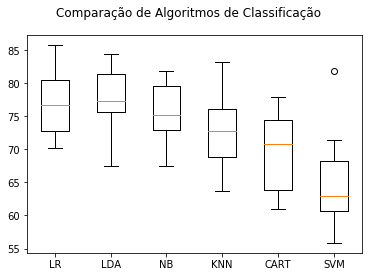

--------------------------------------------------------------------
MODELO: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)      

MÉDIA: 76.95%
DESVIO PADRDÃO: 4.84%
--------------------------------------------------------------------
MODELO: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)      

MÉDIA: 77.35%
DESVIO PADRDÃO: 5.16%
--------------------------------------------------------------------
MODELO: GaussianNB(priors=None)      

MÉDIA: 75.52%
DESVIO PADRDÃO: 4.28%
--------------------------------------------------------------------
MODELO: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
 

In [86]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Criando uma lista de modelos
models = [] # name, model
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

models_name = [] #irá armazenar o NOME do modelo preditivo usado
results = [] #irá armazenar o RESULTADO da acurácia do modelo
messages = [] #irá armazenar mensagens

for name, model in models:
    #Separando os dados em K_FOLDS (dobras)
    k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

    #Criação do modelo
    result_output = cross_validation.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                                    ,preditoras # x = variável com os valores preditores
                                                    ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                                    ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                                    #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                                    ,scoring = 'accuracy'
                                                    #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                                    )

    #Colocando o NOME do modelo medido em uma lista.
    models_name.append(name)
    #Colocando o resultado da acurácia do modelo em uma lista. Scoring selecionado: "accuracy".
    results.append(result_output*100)
    #Saída para mensagem final
    messages.append('MODELO: %s      \n\nMÉDIA: %.2f%%\nDESVIO PADRDÃO: %.2f%%' % (model, (result_output.mean()*100), (result_output.std()*100)))

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------', '\n')
print('Resultado da construção de modelos preditivos para problemas de CLASSIFICAÇÂO')
print('Técnica para divisão dos dados: Cross Validation com Fold"s (Dobras).')
print('Qtd. FOLD"s:', qtd_folds, '\n')

#Gerando gráfico para comparativo da acurácia dos modelos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models_name)
plt.show()

#Forma descritiva
qtd_messages = len(messages)
iterator = 0

while qtd_messages > iterator:
    print('--------------------------------------------------------------------')
    print(messages[iterator])
    iterator = iterator + 1
print('--------------------------------------------------------------------')

## 10. Otimização do modelo preditivo através de ajustes de parâmetros
Ajuste "fino" de parâmetros dos algoritmos, para se obter uma melhor acurácio nos modelos. Essa etapa também pode ser dinamizada.

Esse processo é tambpem conhecido como OTIMIZAÇÃO HYPERPARÂMETRO. O scikit-learn oferece dois métodos para otimização automática dos parâmetros:

- GRID SEARCH PARAMETER TUNNING
- RANDOM SEARCH PARAMETER TUNNING

#### 10.1. Grid Search parameter Tunning
Essa função testa o resultado do valor de um parâmetro em relação a combinação entre todos os outros parâmetros do algoritmo.

Ao final, gera uma "grade" indicando a melhor média e desvio padrão do melhor valor para o parâmetro avaliado.

In [114]:
from pandas import read_csv
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição dos valores de teste
val_alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
val_grid = dict(alpha = val_alphas) #transformando os valores alpha em uma DICT

#Criação do modelo
model = Ridge()
grid = GridSearchCV(estimator = model, param_grid = val_grid)
grid.fit(preditoras, alvo)

#Imprimindo o resultado dos testes
print('Valores avaliados para o parâmetro "alpha" do algoritmo Ridge:')
print(val_alphas, '\n')
print('-> Melhor valor avaliado entre todos para o parâmetro "alpha":', grid.best_estimator_.alpha, '\n')
print('-> Algoritmo com seus parâmetros. O melhor valor avaliado para o parâmetro "alpha" está indicado:')
print(grid.best_estimator_, '\n')
print('-> Score para o melhor valor avaliado para o parâmetro "alpha" (quanto > melhor!):', grid.best_score_, '\n')
print('-> Tabela geral com a avaliação dos valores para os parâmetros testados:')
print(grid.grid_scores_)

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

Valores avaliados para o parâmetro "alpha" do algoritmo Ridge:
[  1.00000000e+00   1.00000000e-01   1.00000000e-02   1.00000000e-03
   1.00000000e-04   0.00000000e+00] 

-> Melhor valor avaliado entre todos para o parâmetro "alpha": 1.0 

-> Algoritmo com seus parâmetros. O melhor valor avaliado para o parâmetro "alpha" está indicado:
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

-> Score para o melhor valor avaliado para o parâmetro "alpha" (quanto > melhor!): 0.2796175593129721 

-> Tabela geral com a avaliação dos valores para os parâmetros testados:
[mean: 0.27962, std: 0.05743, params: {'alpha': 1.0}, mean: 0.27960, std: 0.05751, params: {'alpha'

#### 10.2. Random Search Parameter Tuning
À partir de uma DISTRIBUIÇÃO RANDÔMICA UNIFORME de valores de um parâmetro, é efetuado um número "X" de ITERAÇÕES com o modelo preditivo para cada uma das combinações de valores deste parâmetro. O resultado dessas iterações irá gerar um score de acurácia para cada um dos valores testados para o parâmetro.

Basicamente cria uma série de modelos com diferentes valores para os parâmetros de forma dinamizada.

In [124]:
from pandas import read_csv
import numpy as np
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.grid_search import RandomizedSearchCV
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição dos valores de teste
val_grid = {'alpha': uniform()}
seed = 7

#Criação do modelo
model = Ridge()
iterations = 100 #Para o algoritmo Random Search Parameter Tuning, é um parâmetro importante!
research = RandomizedSearchCV(estimator = model, 
                             param_distributions = val_grid,
                             n_iter = iterations, 
                             random_state = seed)
research.fit(preditoras, alvo)

#Imprimindo o resultado dos testes
print('-> Melhor valor avaliado entre todos para o parâmetro "alpha":', research.best_estimator_.alpha, '\n')
print('-> Algoritmo com seus parâmetros. O melhor valor avaliado para o parâmetro "alpha" está indicado:')
print(research.best_estimator_, '\n')
print('-> Score para o melhor valor avaliado para o parâmetro "alpha" (quanto > melhor!):', research.best_score_, '\n')
print('-> Tabela geral com a avaliação dos valores para os parâmetros testados:')
print(research.grid_scores_)

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

-> Melhor valor avaliado entre todos para o parâmetro "alpha": 0.998845554191 

-> Algoritmo com seus parâmetros. O melhor valor avaliado para o parâmetro "alpha" está indicado:
Ridge(alpha=0.99884555419111987, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001) 

-> Score para o melhor valor avaliado para o parâmetro "alpha" (quanto > melhor!): 0.27961753673530915 

-> Tabela geral com a avaliação dos valores para os parâmetros testados:
[mean: 0.27961, std: 0.05744, params: {'alpha': 0.8041928974028032}, mean: 0.27960, std: 0.05750, params: {'alpha': 0.23060626809064178}, mean: 0.27962, std: 0.05743, params: {'alpha': 0.90138368154969806}, mean: 0.27960, std: 0.05751, pa

## 11. Salvando o resultado do seu trabalho

In [132]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
test_size = 0.33 # 33% dos valores do dataset serão destinado à TESTE

#Garante que os resultados podem ser reproduzidos
#Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Criação do modelo
preditoras_treino, preditoras_teste, alvo_treino, alvo_teste = cross_validation.train_test_split(
                                                                                         preditoras
                                                                                        ,alvo
                                                                                        ,test_size = test_size #tamanho do conjunto de teste: 33%
                                                                                        ,random_state = seed #semente
                                                                                        )

print('Gerando as variáveis: \n->preditoras_treino\n->preditoras_teste\n->alvo_treino\n->alvo_teste\n')

#Gerando modelo de regressão logísitca, passando valores das variáveis de TREINO...
model = LogisticRegression()
model.fit(preditoras_treino, alvo_treino)

# Salvando o modelo
file = 'model_v1.sav'
pickle.dump(model, open(file, 'wb'))

# Carregando o arquivo
model_v1 = pickle.load(open(file, 'rb'))
result = model_v1.score(preditoras_treino, alvo_treino)

# Print do resultado
print('-> Acurácia do modelo de classificação gerado com REGRESSÃO LOGÍSTICA: %.2f%%' % round((result*100),2))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

Gerando as variáveis: 
->preditoras_treino
->preditoras_teste
->alvo_treino
->alvo_teste

-> Acurácia do modelo de classificação gerado com REGRESSÃO LOGÍSTICA: 78.21%


## 12. Otimizando performance - Métodos ENSEMBLE
Métodos Ensemble permitem aumentar consideravelmente o nível de precisão nas suas previsões. Veremos como criar alguns dos Métodos Ensemble mais poderosos em Python. Existem 3 métodos principais para combinar previsões a partir de diferentes modelos:

- BAGGING - Para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de de diferentes subsets no dataset de treino.

- BOOSTING - Temos um conjunto de modelos do mesmo tipo, onde a saída de um modelo gera um erro. Esse erro é usado para o aprendizado do modelo sucessor, que também irá gerar um erro, que também será usado para o aprendizado do próximo modelo, e assim sucessivamente.

- VOTING - Para construção de múltiplos modelos (normalmente do tipos diferentes) e estatísticas simples (como a média) são usadas para combinar as previsões.

### 12.1. BAGGING

#### 12.1.1. BAGGED DECICION TREE
Constrói um conjunto de modelos, com base no algoritmo escolhido (mesmo tipo).

In [15]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = cross_validation.KFold(n = qtd_instances, n_folds = qtd_folds, random_state = seed)

#Criação do modelo
model = DecisionTreeClassifier()

#Como foi escolhido o modelo de classificação DecisionTreeClassifier(), temos de definir a quantidade de ÁRVORES
num_trees = 100

#Criação do modelo com o método ENSEMBLE
Ensemble = BaggingClassifier(base_estimator = model, n_estimators = num_trees, random_state = seed)

#Passando os dados para treino/teste com a validação cruzada
result = cross_validation.cross_val_score(Ensemble #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 62.34 %
FOLD[ 1 ] = 83.12 %
FOLD[ 2 ] = 75.32 %
FOLD[ 3 ] = 67.53 %
FOLD[ 4 ] = 80.52 %
FOLD[ 5 ] = 80.52 %
FOLD[ 6 ] = 81.82 %
FOLD[ 7 ] = 84.42 %
FOLD[ 8 ] = 71.05 %
FOLD[ 9 ] = 75.0 %
MÉDIA:76.16%      DESVIO PADRDÃO:6.93%


#### 12.1.2. RANDOM FOREST
Conjunto de árvore de decisão que usa amostragem do dataset de treino com reposição. Isso se faz becessário para reduzir a correlação entre classificadores individuais, caso contrário, teríamos problemas de colineariedade.

In [7]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados
#qtd_instances = len(preditoras) #no caso, como são 8 colunas, o qtd_instances = 8

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = model_selection.KFold(n_splits = qtd_folds, shuffle = True, random_state = seed)

#Como foi escolhido o modelo de classificação RandomForestClassifier(), temos de definir a quantidade de ÁRVORES e
#o máximo de features
num_trees = 100
max_features = 3

#Criação do modelo de RandomForestClassifier()
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

#Passando os dados para treino/teste com a validação cruzada
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 80.52 %
FOLD[ 1 ] = 80.52 %
FOLD[ 2 ] = 77.92 %
FOLD[ 3 ] = 72.73 %
FOLD[ 4 ] = 81.82 %
FOLD[ 5 ] = 70.13 %
FOLD[ 6 ] = 81.82 %
FOLD[ 7 ] = 75.32 %
FOLD[ 8 ] = 73.68 %
FOLD[ 9 ] = 73.68 %
MÉDIA:76.81%      DESVIO PADRDÃO:4.02%


### 12.2. BOOSTING

#### 12.2.1. ADABOOST
Criam uma sequência de modelos que tentam corrigir os erros do modelo antecessor, dentro da sequência. Os resultados são combinados entre todos os modelos, considerando um peso para a acurácia de cada modelo gerado. Essa combinação irá gerar o modelo final.

Além disso, o peso dos modelos é influênciado pelos seus respectivos dataset's: o adaboost atribui um peso às instãncias do  dataset's, para definir o quão fácil ou difícil elas são para o processo de classificação.

In [9]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = model_selection.KFold(n_splits = qtd_folds, shuffle = True, random_state = seed)

#Como foi escolhido o modelo de classificação RandomForestClassifier(), temos de definir a quantidade de ÁRVORES e
#o máximo de features
num_trees = 100

#Criação do modelo de AdaBoostClassifier()
model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

#Passando os dados para treino/teste com a validação cruzada
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 80.52 %
FOLD[ 1 ] = 80.52 %
FOLD[ 2 ] = 74.03 %
FOLD[ 3 ] = 71.43 %
FOLD[ 4 ] = 74.03 %
FOLD[ 5 ] = 68.83 %
FOLD[ 6 ] = 80.52 %
FOLD[ 7 ] = 80.52 %
FOLD[ 8 ] = 73.68 %
FOLD[ 9 ] = 67.11 %
MÉDIA:75.12%      DESVIO PADRDÃO:4.88%


#### 12.2.2. GRADIENT BOOSTING
Stochastic Gradient Boosting

In [12]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = model_selection.KFold(n_splits = qtd_folds, shuffle = True, random_state = seed)

#Como foi escolhido o modelo de classificação RandomForestClassifier(), temos de definir a quantidade de ÁRVORES e
#o máximo de features
num_trees = 100

#Criação do modelo de GradientBoostingClassifier()
model = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

#Passando os dados para treino/teste com a validação cruzada
result = model_selection.cross_val_score(model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 80.52 %
FOLD[ 1 ] = 77.92 %
FOLD[ 2 ] = 80.52 %
FOLD[ 3 ] = 68.83 %
FOLD[ 4 ] = 79.22 %
FOLD[ 5 ] = 70.13 %
FOLD[ 6 ] = 84.42 %
FOLD[ 7 ] = 76.62 %
FOLD[ 8 ] = 71.05 %
FOLD[ 9 ] = 72.37 %
MÉDIA:76.16%      DESVIO PADRDÃO:4.99%


### 12.3. VOTING

#### 12.3.1. VOTING ENSEMBLE
A partir da criação de dois ou mais modelos separados de dados de treino, utiliza a média das previsões de cada sub-modelo para fazer as previsões em novos conjuntos de dados. 

Através de parâmetros definidos ou por heurística, as previsões de cada sub-modelo podem receber pesos, que irão interferir na na geração do modelo final.

Para implementar este modelo, é necessário ter cuidado com valores outliers, pois estes podem interferir a acurácia dos modelos.

In [14]:
from pandas import read_csv
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
qtd_folds = 10 #qtd dobras de cada instância (amostragem) de dados

#Garante que os resultados podem ser reproduzidos
seed = 1 #"semente" = if int, is the seed used by the random number generator.

#Separando os dados em K_FOLDS (dobras)
k_folds = model_selection.KFold(n_splits = qtd_folds, shuffle = True, random_state = seed)

# Criando os sub-modelos e colocando em uma lista. Após, estes serão passados para o VOTING
estimators = []

#Criação do modelo de LogisticRegression()
model_01 = LogisticRegression()
estimators.append(('logistic', model_01)) #model_01 sendo inserido na lista "estimators"

#Criação do modelo de DecisionTreeClassifier()
model_02 = DecisionTreeClassifier()
estimators.append(('cart', model_02)) #model_02 sendo inserido na lista "estimators"

#Criação do modelo de SVC()
model_03 = SVC()
estimators.append(('svm', model_03)) #model_03 sendo inserido na lista "estimators"

# Criando o modelo ensemble
ensemble_model = VotingClassifier(estimators) #Passando como parâmetro a lista de modelos que o VOTING irá trabalhar

#Passando os dados para treino/teste com a validação cruzada
result = model_selection.cross_val_score(ensemble_model #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                         ,preditoras # x = variável com os valores preditores
                                         ,alvo # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                         ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                         ,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                         )

#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------')
print('\nEstimador da validação cruzada para cada um dos', qtd_folds, 'FOLDS (dobras de cada instância):')

count = len(result)
fold = 0

while count > fold:
    print('FOLD[', fold,'] =', round((result[fold]*100),2), '%')
    fold = fold + 1
print('MÉDIA:%.2f%%      DESVIO PADRDÃO:%.2f%%' % ((result.mean()*100), (result.std()*100)))

Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes 

Criando um array "alvo" com os dados da coluna "tem_diabetes"... 

----------------> Acurácia <----------------

Estimador da validação cruzada para cada um dos 10 FOLDS (dobras de cada instância):
FOLD[ 0 ] = 75.32 %
FOLD[ 1 ] = 79.22 %
FOLD[ 2 ] = 68.83 %
FOLD[ 3 ] = 74.03 %
FOLD[ 4 ] = 79.22 %
FOLD[ 5 ] = 71.43 %
FOLD[ 6 ] = 81.82 %
FOLD[ 7 ] = 72.73 %
FOLD[ 8 ] = 71.05 %
FOLD[ 9 ] = 69.74 %
MÉDIA:74.34%      DESVIO PADRDÃO:4.22%


### 12.4. XGBoost - Extreme Gradient Boosting

Como é uma variação melhorada do "Gradient Boosting Method".

Características que mostram o potencial deste algoritmo:

- Permite trabalhar com matrizes esparsas como input sem armazenar zeros na memória e sem a necessidade de conversão para matrizes densas.

- Através de uma árvore de aprendizagem, utiliza um método de split conhecido como quatile sketch, que reduz consideravelmente o tempo de processamento.

- Permite trabalhar com multithreading (várias threads abertas) em apenas uma máquina assim como também atua com processamento paralelo em um cluster de N servidores distribuídos.

- Atua no tratamento de dados missing (Nan).

Repositório no Github: https://github.com/dmlc/XGBoost

#### Instalar XGBoost dentro do Jupiter Notebook (Linux ou MAC):
    !pip install xgboost

#### Instalar versão mais recente do XGBoost através do respositório oficial no Github (Linux ou MAC), usando o GIT BASH:

    git clone --recursive https://github.com/dmlc/xgboost

    cd xgboost

    cp make/minimum.mk ./config.mk

    make -j4

    cd python-package

    sudo python setup.py install

- Para Windows, há dependências de construtor (MAKE) que devem ser atendidas antes da instalação. Maiores detalhe, verificar a documentação da própria biblioteca do XGBoost.

In [24]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from biblioteca.pacote import função

# Carregando arquivo csv usando PANDAS
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
columns = ['qtd_vzs_gravida', 'concent_plas_glicose', 'pres_sanguinea', 'esp_triceps', 'insul_serica', 'ind_m_corporal', 'd_pedigree', 'idade', 'tem_diabetes']
data = read_csv(filepath_or_buffer=url, names=columns, delimiter=',')

#Separando o array em componente de input (preditores) e output (previsores)
print('Criando um array "preditoras" com os dados das colunas: qtd_vzs_gravida, concent_plas_glicose, pres_sanguinea, esp_triceps, insul_serica, ind_m_corporal, d_pedigree, idade, tem_diabetes', '\n')
preditoras = data.values[:,0:8] #slice selecionando todas as linhas da coluna 0 até a coluna 8 (excludente)

print('Criando um array "alvo" com os dados da coluna "tem_diabetes"...', '\n')
alvo = data.values[:,8] #slice selecionando todas as linhas da coluna 8 (inclusiva)

#Definição do tamanho das amostras
test_size = 0.33 # 33% dos valores do dataset serão destinado à TESTE

#Garante que os resultados podem ser reproduzidos
seed = 7 #"semente" = if int, is the seed used by the random number generator.

#Divisão dos dados em treino e teste com a função train_test_split()
preditoras_treino, preditoras_teste, alvo_treino, alvo_teste = cross_validation.train_test_split(
                                                                                         preditoras
                                                                                        ,alvo
                                                                                        ,test_size = test_size #tamanho do conjunto de teste: 33%
                                                                                        ,random_state = seed #semente
                                                                                        )

#Criação do modelo de XGBClassifier()
model = XGBClassifier()
model.fit(preditoras_treino, alvo_treino) #Treinando o modelo

# Pront do modelo
print('Imprimindo o modelo e seus respectivos parâmetros (pós-treino):')
print(model)

#Passando os dados para teste
alvo_teste = model.predict(preditoras_teste)
previsions = [round(value) for value in alvo_teste]

#Imprimindo a acurácia do modelo com base nos dados de teste
print('----------------> Acurácia <----------------')
accuracy = accuracy_score(alvo_teste, previsions)
print("Acurácia: %.2f%%" % (accuracy * 100.0))